**<center><h1>AFD</h1></center>**

### **Content**

1. Data Preprocessing
2. Classification
    * DecisionTreeClassifier
    * RandomForestClassifier
    * KNeighborsClassifier
    * LogisticRegression
3. Clustering

## **1. Data preprocessing**

In [1]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.preprocessing import StandardScaler

In [2]:
# read the data
df = pd.read_csv("data.csv",header = 0)
df.drop('Unnamed: 32',axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [3]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
df.describe(include="all")

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [6]:
# check for duplicate rows
df.duplicated().sum()

0

In [7]:
# check for Nan values
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

after exploring our dataset, we noticed that we don't have Nan values and duplicate rows

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


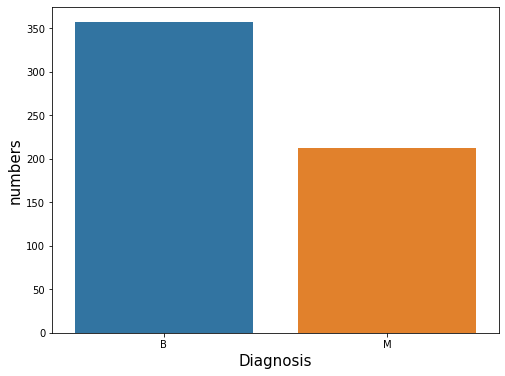

In [9]:
df_plotted = df['diagnosis'].value_counts()
# Defining the plotsize
plt.figure(figsize=(8, 6))
# Defining the x-axis, the y-axis and the data
plots = sns.barplot(x=df_plotted.index, y=df_plotted)
# Setting the x-acis label and its size
plt.xlabel("Diagnosis", size=15)

# Setting the y-axis label and its size
plt.ylabel("numbers", size=15)

# Finallt plotting the graph
plt.show()

The **diagnosis** (target) variable that we are going to use is imbalanced.

Now let's check the correlation between the variables

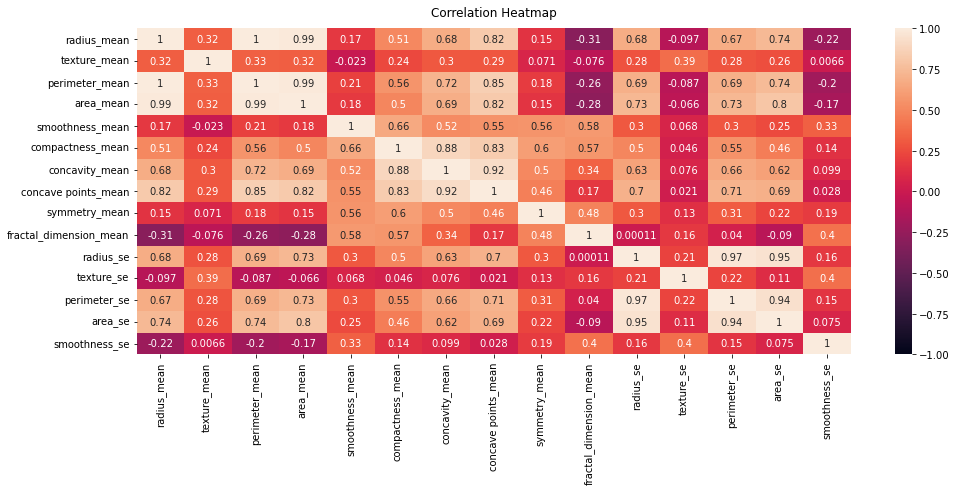

In [10]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.iloc[:, 0:16].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## **2. Classification**

For classification, we are going to use diagnosis as target variable

In [11]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

Declare feature vector and target variable 

In [12]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

Split data into separate training and test set 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((381, 30), (188, 30), (381,), (188,))

### DecisionTreeClassifier

In [15]:
dtc = DecisionTreeClassifier(random_state=0)
# fit the model
dtc.fit(X_train, y_train)
# Predict the Test set results
y_pred = dtc.predict(X_test)

In [16]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {classification_report(y_test, y_pred)}\n")

Accuracy Score: 91.49%
_______________________________________________
Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       121
           1       0.82      0.97      0.89        67

    accuracy                           0.91       188
   macro avg       0.90      0.93      0.91       188
weighted avg       0.93      0.91      0.92       188




### RandomForestClassifier

In [17]:
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)

In [18]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {classification_report(y_test, y_pred)}\n")

Accuracy Score: 95.21%
_______________________________________________
Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       121
           1       0.95      0.91      0.93        67

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188




Until now, I have used all the features given in the model. So, let's see the important features in our dataset.

In [19]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

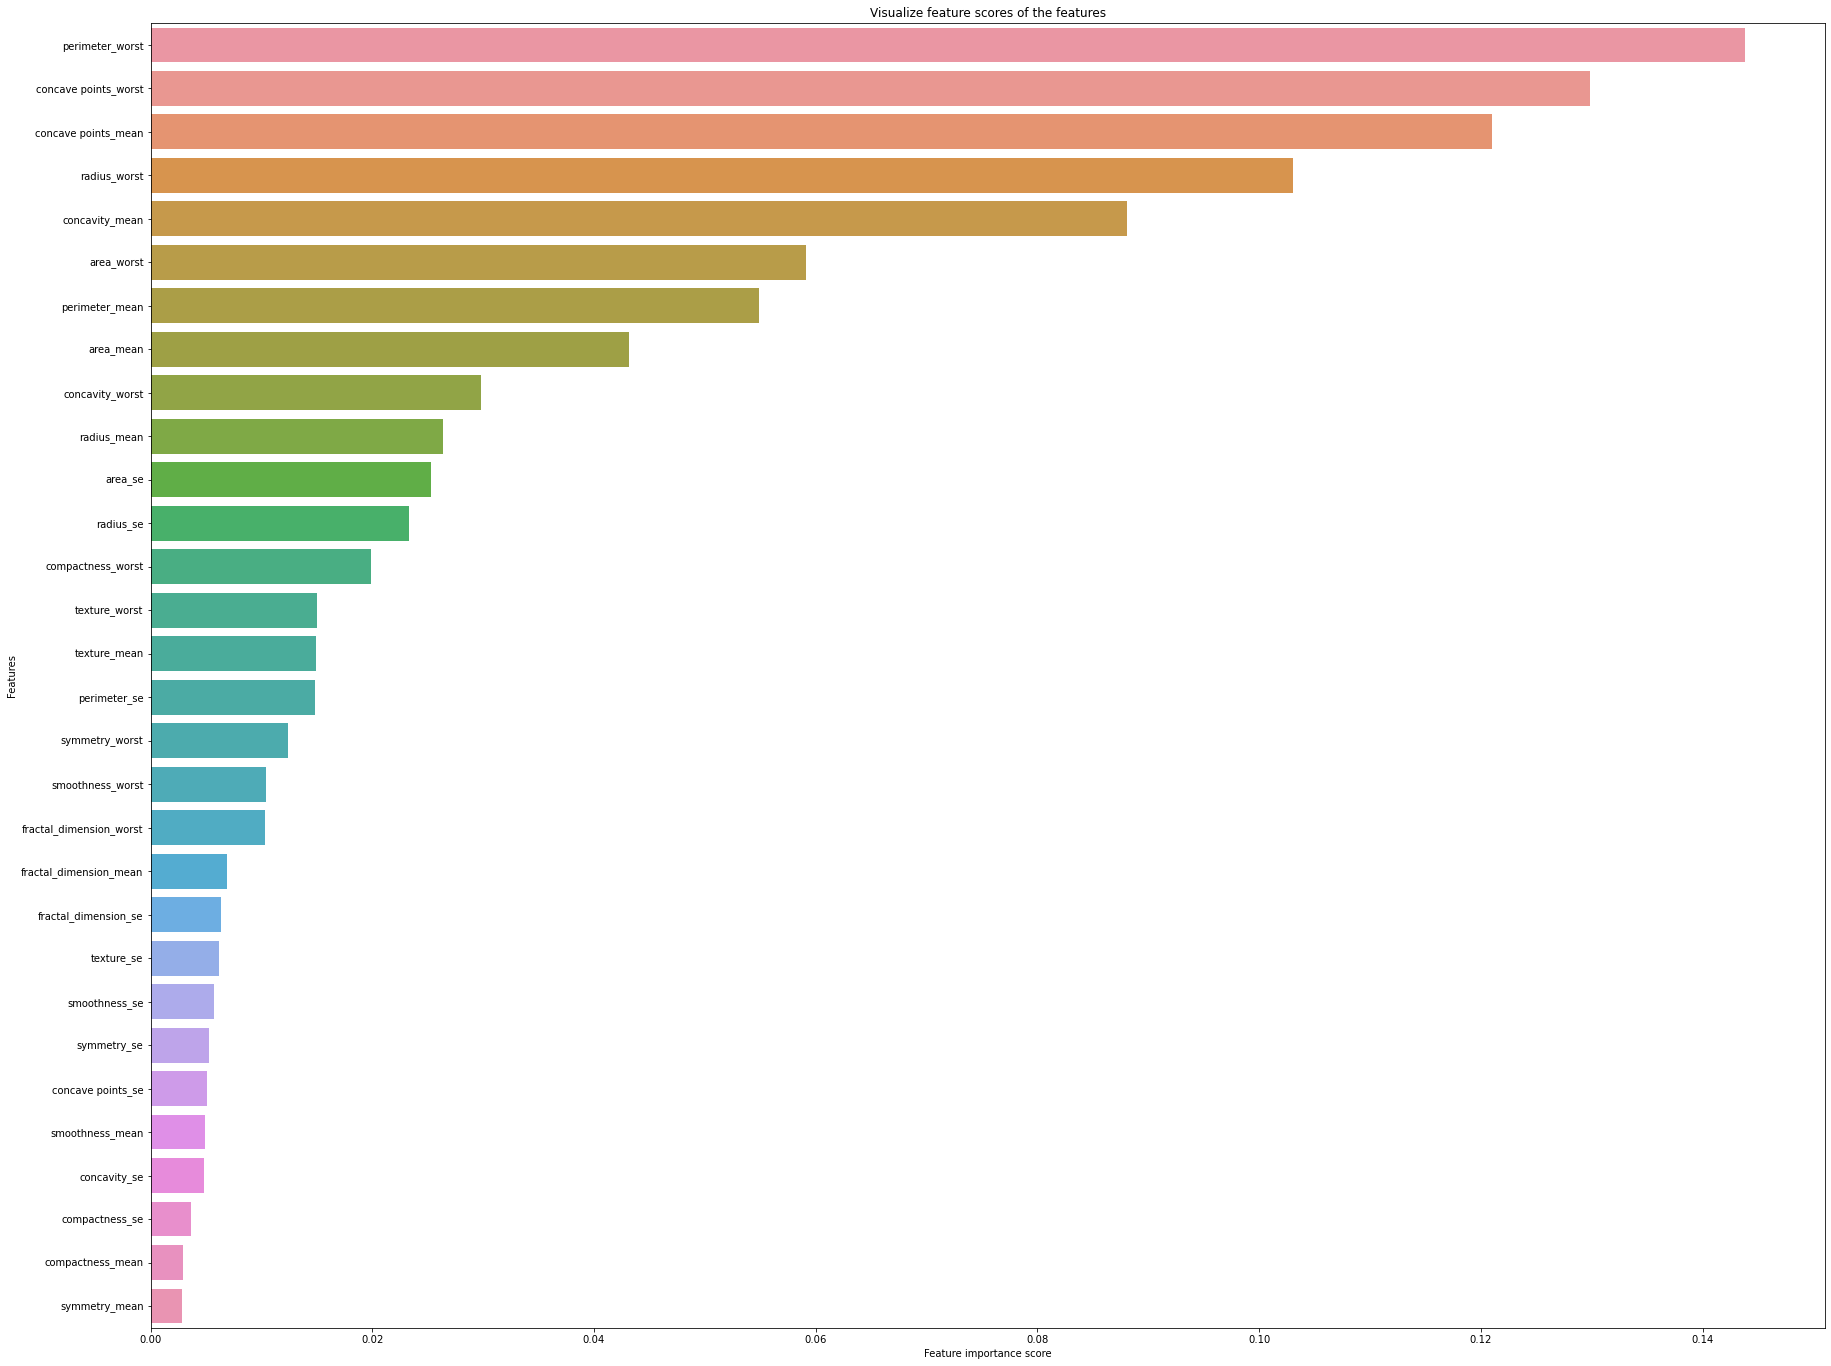

In [20]:
# Creating a seaborn bar plot
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

let's drop some least important features to see if there is any difference in the performance of the model

In [21]:
# drop the least important feature from X_train and X_test
X_train_mod = X_train.drop(['symmetry_mean', 'compactness_mean', 'compactness_se'], axis=1)
X_test_mod = X_test.drop(['symmetry_mean', 'compactness_mean', 'compactness_se'], axis=1)

In [22]:
# retrain the model
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train_mod, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test_mod)

In [23]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {classification_report(y_test, y_pred)}\n")

Accuracy Score: 95.74%
_______________________________________________
Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       121
           1       0.95      0.93      0.94        67

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188




We can see that the accuracy of the model has slightly increased from the previous prediction

### KNeighborsClassifier

In [24]:
knnc = KNeighborsClassifier(n_neighbors=20)
# fit the model
knnc.fit(X_train, y_train)
# Predict the Test set results
y_pred = knnc.predict(X_test)

In [25]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {classification_report(y_test, y_pred)}\n")

Accuracy Score: 95.74%
_______________________________________________
Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       121
           1       0.98      0.90      0.94        67

    accuracy                           0.96       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.96      0.96      0.96       188




### LogisticRegression

In [26]:
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [27]:
lgc = LogisticRegression(random_state=0, max_iter=100)
# fit the model
lgc.fit(X_train_std, y_train)
# Predict the Test set results
y_pred = lgc.predict(X_test_std)

In [28]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {classification_report(y_test, y_pred)}\n")

Accuracy Score: 97.87%
_______________________________________________
Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       121
           1       0.96      0.99      0.97        67

    accuracy                           0.98       188
   macro avg       0.97      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188




## **3. Clustering**

For the clustering, we decided to use only texture_mean and concavity_mean for easy visualisation

In [29]:
X_C = X[['texture_mean', 'concavity_mean']]

In [30]:
X_C.head()

,texture_mean,concavity_mean
0,10.38,0.3001
1,17.77,0.0869
2,21.25,0.1974
3,20.38,0.2414
4,14.34,0.1980


In [31]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_C)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


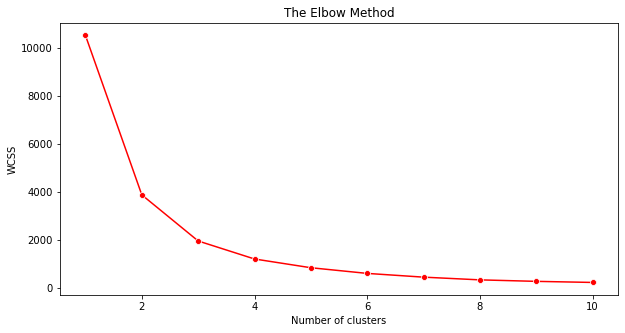

In [32]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
pip install kneed


Note: you may need to restart the kernel to use updated packages.


In [34]:
from kneed import KneeLocator
k = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
k.elbow


3

In [35]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_C)

In [36]:
X_C

,texture_mean,concavity_mean
0,10.38,0.30010
1,17.77,0.08690
2,21.25,0.19740
3,20.38,0.24140
4,14.34,0.19800
...,...,...
564,22.39,0.24390
565,28.25,0.14400
566,28.08,0.09251
567,29.33,0.35140


In [37]:
X_C["Clusters"] = y_kmeans

C:\Users\Dell\AppData\Local\Temp\ipykernel_3044\4020080534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_C["Clusters"] = y_kmeans


In [38]:
y_kmeans

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 2,
       0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 2,
       0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,

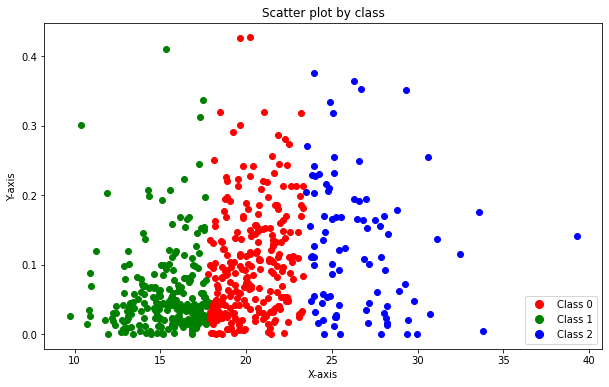

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

# Sample data
x = X_C['texture_mean']
y = X_C['concavity_mean']
classes = y_kmeans # Class labels for each point

# Assign colors to each class
colors = ['r', 'g', 'b', 'y', 'brown']
color_map = {k: colors[i] for i, k in enumerate(set(classes))}

# Plot each point with the corresponding color
for i in range(len(x)):
    plt.scatter(x[i], y[i], color=color_map[classes[i]])

# Add legend
handles = [plt.plot([], [], color=color_map[i], marker="o", ls="", markersize=8)[0] for i in color_map]
labels = [f"Class {i}" for i in color_map]
plt.legend(handles, labels, loc="lower right")

# Set plot title and axis labels
plt.title('Scatter plot by class')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show plot
plt.show()


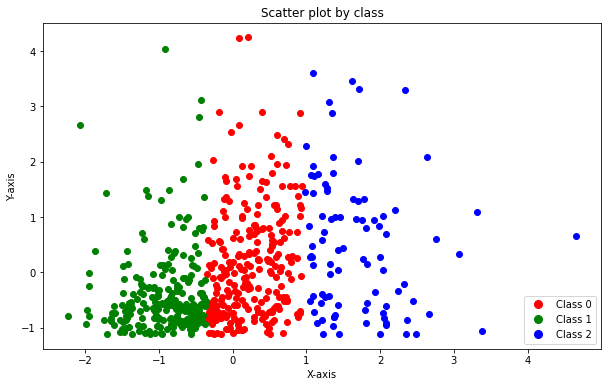

In [40]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sample data
x = X_C['texture_mean']
y = X_C['concavity_mean']
classes = y_kmeans # Class labels for each point

# Apply StandardScaler to x and y
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.values.reshape(-1,1)).flatten()
y_scaled = scaler.fit_transform(y.values.reshape(-1,1)).flatten()

# Assign colors to each class
colors = ['r', 'g', 'b', 'y', 'brown']
color_map = {k: colors[i] for i, k in enumerate(set(classes))}

# Plot each point with the corresponding color
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(x)):
    ax.scatter(x_scaled[i], y_scaled[i], color=color_map[classes[i]])

# Add legend
handles = [ax.plot([], [], color=color_map[i], marker="o", ls="", markersize=8)[0] for i in color_map]
labels = [f"Class {i}" for i in color_map]
ax.legend(handles, labels, loc="lower right")

# Set plot title and axis labels
ax.set_title('Scatter plot by class')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Show plot
plt.show()


# profiling

In [41]:
dataset_cluster = pd.concat([X_C, pd.DataFrame({'Cluster': y_kmeans})], axis=1)
dataset_cluster.head()

,texture_mean,concavity_mean,Clusters,Cluster
0,10.38,0.3001,1,1
1,17.77,0.0869,0,0
2,21.25,0.1974,0,0
3,20.38,0.2414,0,0
4,14.34,0.1980,1,1


In [42]:
x1 = dataset_cluster.iloc[:,0:2]
x1.head()

,texture_mean,concavity_mean
0,10.38,0.3001
1,17.77,0.0869
2,21.25,0.1974
3,20.38,0.2414
4,14.34,0.1980


In [43]:
y1 = dataset_cluster.iloc[:,2:3]
y1.head()

,Clusters
0,1
1,0
2,0
3,0
4,1


In [44]:
y1

,Clusters
0,1
1,0
2,0
3,0
4,1
...,...
564,0
565,2
566,2
567,2


In [45]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install ipython

Note: you may need to restart the kernel to use updated packages.


In [47]:
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5)
model.fit(x1,y1)

DecisionTreeClassifier(max_depth=5)

In [48]:
col_names = ['texture_mean', 'concavity_mean']

In [49]:
tree.export_graphviz(model,feature_names = col_names,\
                    out_file = 'tree.dot',\
                    label = 'all',\
                    filled = True,\
                    rounded = True)

In [50]:
from graphviz import Source
from IPython.display import display

with open('tree.dot') as f:
    dot_graph = f.read()

graph = Source(dot_graph)
display(graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [51]:
Image('tree.png')

NameError: name 'Image' is not defined

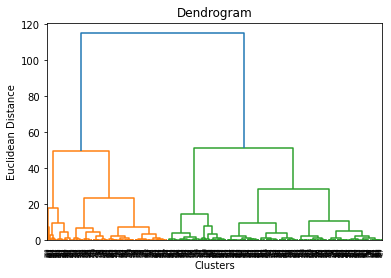

In [61]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


# Apply agglomerative clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x1)

# Generate dendrogram
dendrogram = sch.dendrogram(sch.linkage(x1, method='ward'))

# Add labels to the plot
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')

# Show the plot
plt.show()

In [53]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hc.fit(x1)
y_hc = hc.labels_

In [54]:
y_hc

array([2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2,
       2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1,
       0, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2,
       1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2,
       1, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1,

In [55]:
# Plot the results
plt.scatter(x1[y_hc==0,0], x1[y_hc==0,1], c='red', label='Cluster 0')
plt.scatter(x1[y_hc==1,0], x1[y_hc==1,1], c='blue', label='Cluster 1')
plt.scatter(x1[y_hc==2,0], x1[y_hc==2,1], c='green', label='Cluster 2')
for label, x, y in zip(labels, x1[:,0], x1[:,1]):
    plt.annotate(label,xy=(x,y))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Hierarchical Clustering')
plt.legend()
plt.show()

InvalidIndexError: (array([False, False,  True, False, False, False, False,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True, False, False, False, False,  True,  True, False,  True,
       False,  True, False,  True, False,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False,  True, False, False, False,  True,  True,
       False,  True,  True,  True, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
        True,  True, False, False, False,  True, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False,  True, False, False, False, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True, False, False, False,  True,  True, False, False, False,
       False,  True, False,  True, False, False,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True, False, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True, False,
        True, False, False,  True, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True]), 0)

**<center><h1>silhouette</h1></center>**
   

In [57]:
from sklearn.metrics import silhouette_score

In [58]:
cluster_range = range(2,11)
random_range = range(0,10)

silhouette=[]       

for i in cluster_range:
    for j in random_range:
        cluster=KMeans(n_clusters=i, random_state=j)
        cluster.fit(x1)
        cluster_labels= cluster.labels_
        silhouette_avg= silhouette_score(x1,cluster_labels)
        print("For n_clusters=",i,"and seed=",j, "silhouette avg:", silhouette_avg )
        silhouette.append([i,j,silhouette_avg])

For n_clusters= 2 and seed= 0 silhouette avg: 0.5607089596439077
For n_clusters= 2 and seed= 1 silhouette avg: 0.5607089596439077
For n_clusters= 2 and seed= 2 silhouette avg: 0.5607089596439077
For n_clusters= 2 and seed= 3 silhouette avg: 0.5607089596439077
For n_clusters= 2 and seed= 4 silhouette avg: 0.5607089596439077
For n_clusters= 2 and seed= 5 silhouette avg: 0.5607089596439077
For n_clusters= 2 and seed= 6 silhouette avg: 0.5607089596439077
For n_clusters= 2 and seed= 7 silhouette avg: 0.5607089596439077
For n_clusters= 2 and seed= 8 silhouette avg: 0.5607089596439077
For n_clusters= 2 and seed= 9 silhouette avg: 0.5607089596439077
For n_clusters= 3 and seed= 0 silhouette avg: 0.5467773329038157
For n_clusters= 3 and seed= 1 silhouette avg: 0.5467773329038157
For n_clusters= 3 and seed= 2 silhouette avg: 0.5467773329038157
For n_clusters= 3 and seed= 3 silhouette avg: 0.5467773329038157
For n_clusters= 3 and seed= 4 silhouette avg: 0.5467773329038157
For n_clusters= 3 and see